# **I. Acquiring dataset and exploratory data analysis**


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Importing dependencies
import numpy as np
import PIL
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os
import tensorflow as tf
from tensorflow.keras import layers # False warning
import csv
import cv2
import pandas as pd

!pip install silence_tensorflow
import silence_tensorflow.auto

np.random.seed(42)

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for silence_tensorflow: filename=silence_tensorflow-1.2.1-py3-none-any.whl size=4464 sha256=c91bccc243a7467f5b6fde109c11344d8cd66a014fd1b31252f99387f41e92db
  Stored in directory: /root/.cache/pip/wheels/7d/2c/24/e130d6102c0df56631b9db7479d9a6a53c5d97fb06b5f61b98
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5630 sha256=aaca9ac94612b23341974f5c3848896c5297b494a1b549053248bda7f0047e35
  Stored in directory: /root/.cache/pip/wheels/b6/72/c8/3054a5897ba0713dfa7a941364d68cbd42b0755c8e2ec1c18c
Successfully built silence_tensorflow support_developer


In [2]:
# Downloading dataset
!gdown "https://drive.google.com/uc?id=1fSu9gWbu4MOf7N9u7ir9D5Z6xbKJJnZp&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1fSu9gWbu4MOf7N9u7ir9D5Z6xbKJJnZp&confirm=t
To: /content/GTSRB_dataset.zip
100% 642M/642M [00:14<00:00, 43.6MB/s]


In [3]:
# Extracting dataset
with ZipFile("GTSRB_dataset.zip", 'r') as zip:
    print('Extracting all the files now...')
    zip.extractall('/content/GTSRB_dataset')
    zip.close()
    print('Extraction done!')

Extracting all the files now...
Extraction done!


In [4]:
# Substiting class names with real class names
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

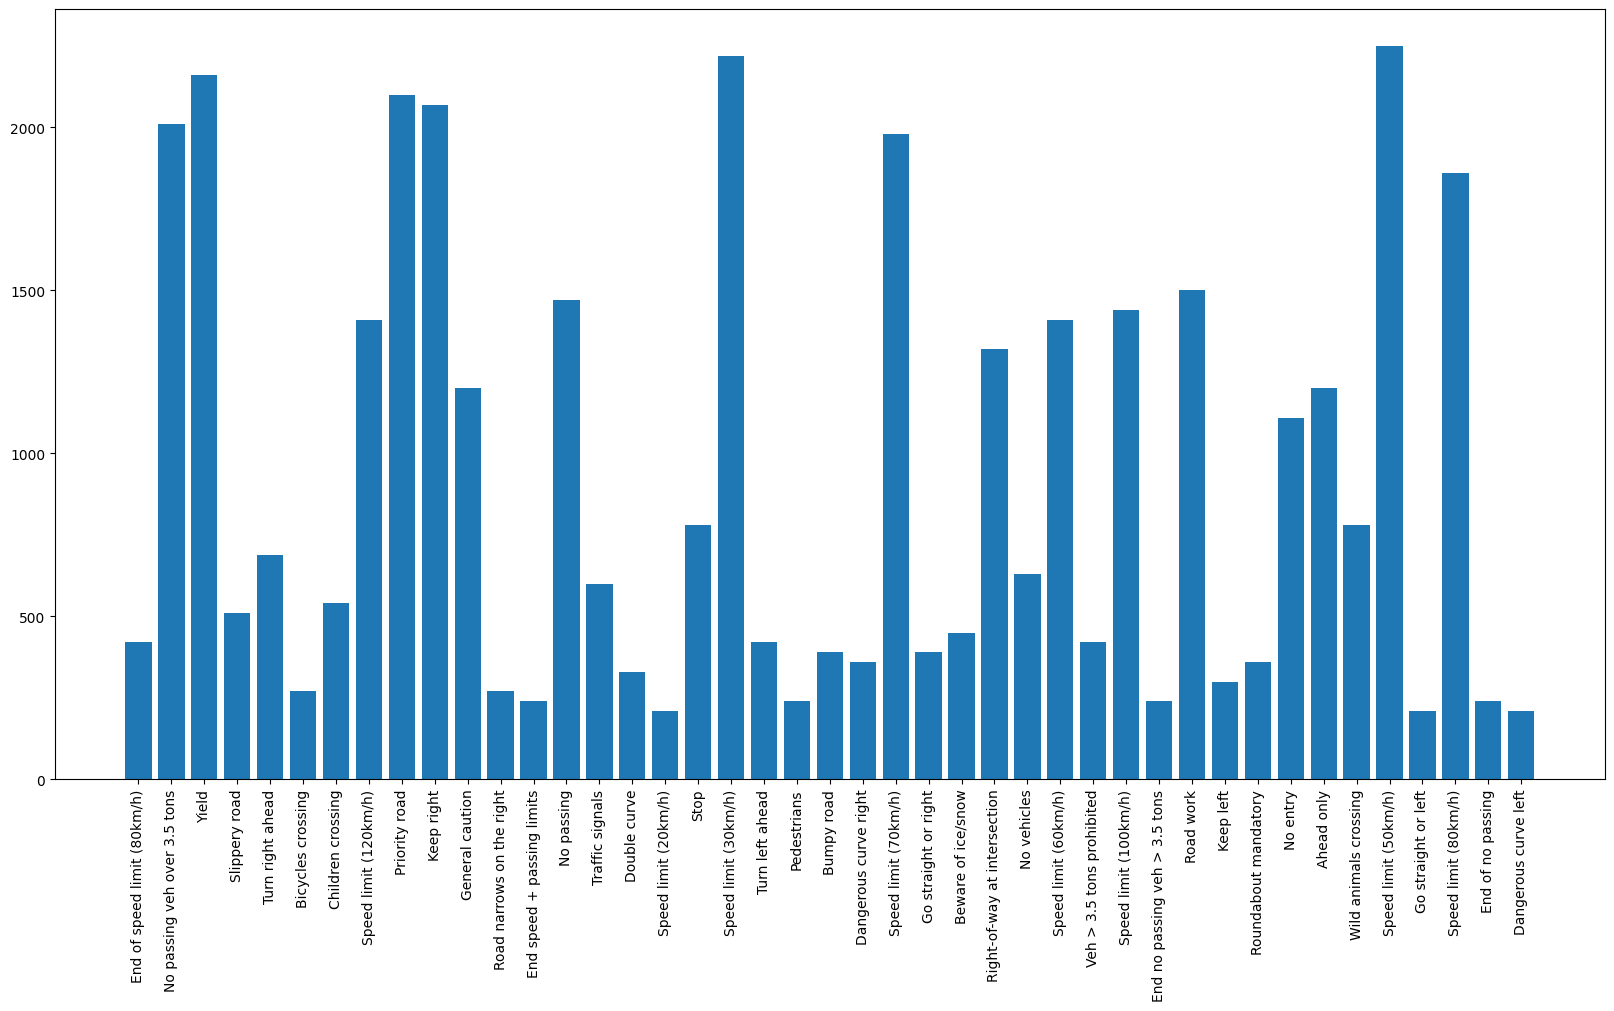

In [5]:
# Showing the distribution of the different classes
DATASET_PATH = '/content/GTSRB_dataset'
TRAIN_SET_PATH = '/content/GTSRB_dataset/Train'
TEST_SET_PATH = '/content/GTSRB_dataset/Test'
folders = os.listdir(TRAIN_SET_PATH)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(TRAIN_SET_PATH + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Plotting the number of images in each class
plt.figure(figsize=(20,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

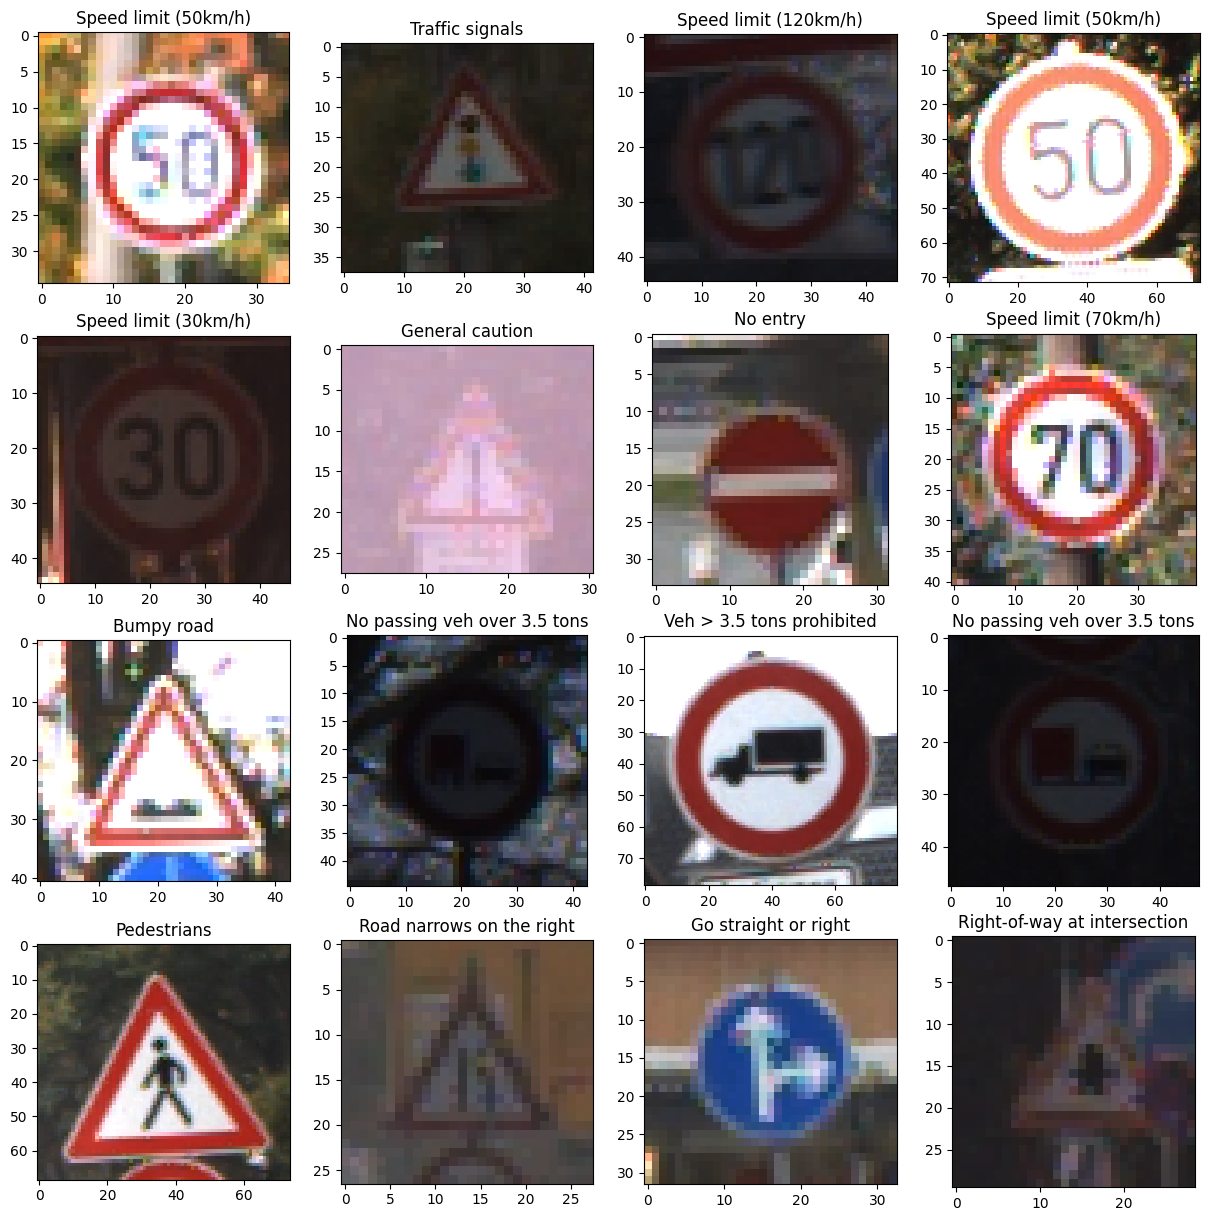

In [6]:
# Showing sample images
fig = plt.figure(figsize=(15, 15))
num_of_classes = len(os.listdir(TRAIN_SET_PATH))
sample_plt_col, sample_plt_row = 4,4

for plot in range(1, sample_plt_col*sample_plt_row +1):
    rand_class = np.random.randint(num_of_classes)
    class_numbers = os.listdir('/content/GTSRB_dataset/Train')
    rand_folder = os.listdir('/content/GTSRB_dataset/Train/' + class_numbers[rand_class])
    ax = fig.add_subplot(sample_plt_col, sample_plt_row, plot)
    img = np.array(PIL.Image.open('/content/GTSRB_dataset/Train/' + str(class_numbers[rand_class]) + '/' + np.random.choice(rand_folder)))
    plt.imshow(img)
    ax.set_title(str(classes[int(class_numbers[rand_class])]))
plt.show()

# **II. Loading dataset and data augmentation**


In [7]:
# Defining parameters for data loading
TRAIN_BATCH_SIZE, VAL_BATCH_SIZE, TEST_BATCH_SIZE = 32,32,32
IMG_HEIGHT, IMG_WIDTH = 40, 40
VAL_SPLIT_RATIO = 0.2

In [8]:
# Loading training data
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_SET_PATH,
    validation_split = VAL_SPLIT_RATIO,
    subset = "training",
    seed=123,
    image_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = (TRAIN_BATCH_SIZE)
)

# Loading training validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_SET_PATH,
    validation_split = VAL_SPLIT_RATIO,
    subset = "validation",
    seed=123,
    image_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = (VAL_BATCH_SIZE)
)

# train_ds_iterator = train_ds.as_numpy_iterator()
# batch = train_ds_iterator.next()

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


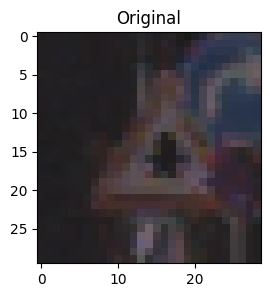

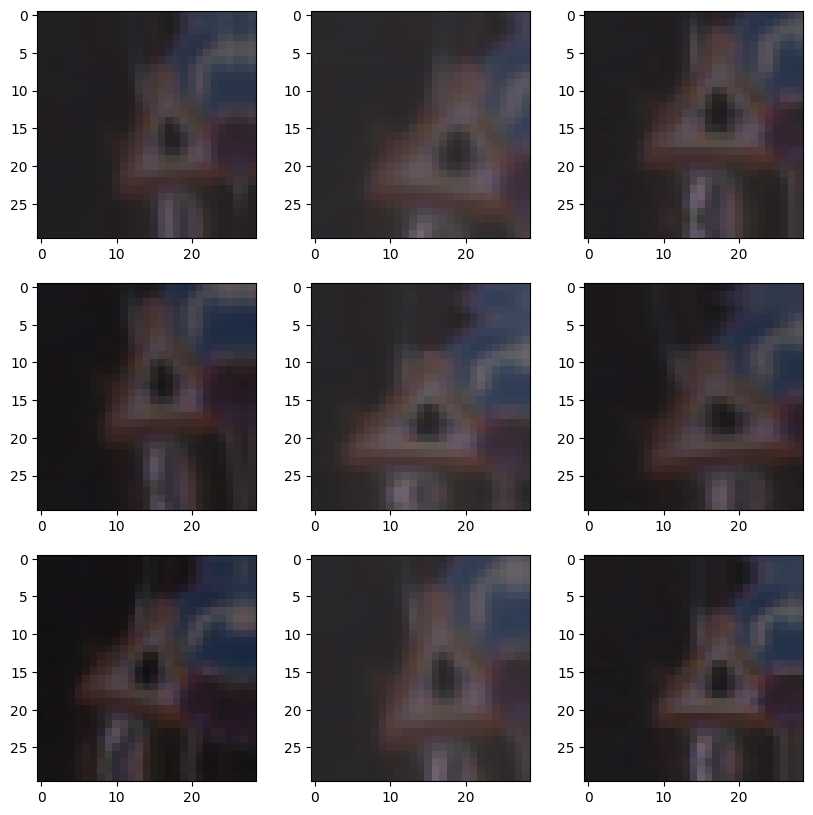

In [9]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomTranslation(height_factor=(-0.1, 0.1),width_factor=(-0.1, 0.1)),
    layers.RandomRotation(0.05),
    layers.RandomZoom(height_factor=(-0.2, 0.2),width_factor=(-0.2, 0.2)),
    layers.RandomContrast(factor=0.1),
    layers.RandomBrightness(factor=0.05)
])

def augmentation(ds):
  AUTOTUNE = tf.data.AUTOTUNE
  ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
  return ds.prefetch(buffer_size=AUTOTUNE)

train_ds_aug = augmentation(train_ds)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.title("Original")
plt.show()
# Showing augmented sample data
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(tf.expand_dims(img,0))
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0]/255)

# **III. Creating the neural network model and training it**

In [10]:
# Creating the model
num_classes = len(train_ds.class_names)

model = tf.keras.models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),

    layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
# Showing model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 18, 18, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)      

In [12]:
# Training the model
epochs=20
history = model.fit(
  train_ds_aug,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True)

Epoch 1/20
981/981 [==============================] - 39s 26ms/step - loss: 1.1005 - accuracy: 0.6994 - val_loss: 0.1250 - val_accuracy: 0.9615
Epoch 2/20
981/981 [==============================] - 25s 25ms/step - loss: 0.2386 - accuracy: 0.9262 - val_loss: 0.0591 - val_accuracy: 0.9818
Epoch 3/20
981/981 [==============================] - 27s 28ms/step - loss: 0.1434 - accuracy: 0.9556 - val_loss: 0.0416 - val_accuracy: 0.9897
Epoch 4/20
981/981 [==============================] - 25s 25ms/step - loss: 0.1236 - accuracy: 0.9624 - val_loss: 0.0620 - val_accuracy: 0.9834
Epoch 5/20
981/981 [==============================] - 25s 25ms/step - loss: 0.1068 - accuracy: 0.9671 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 6/20
981/981 [==============================] - 25s 25ms/step - loss: 0.0933 - accuracy: 0.9714 - val_loss: 0.0210 - val_accuracy: 0.9936
Epoch 7/20
981/981 [==============================] - 26s 26ms/step - loss: 0.0858 - accuracy: 0.9742 - val_loss: 0.0428 - val_accuracy:

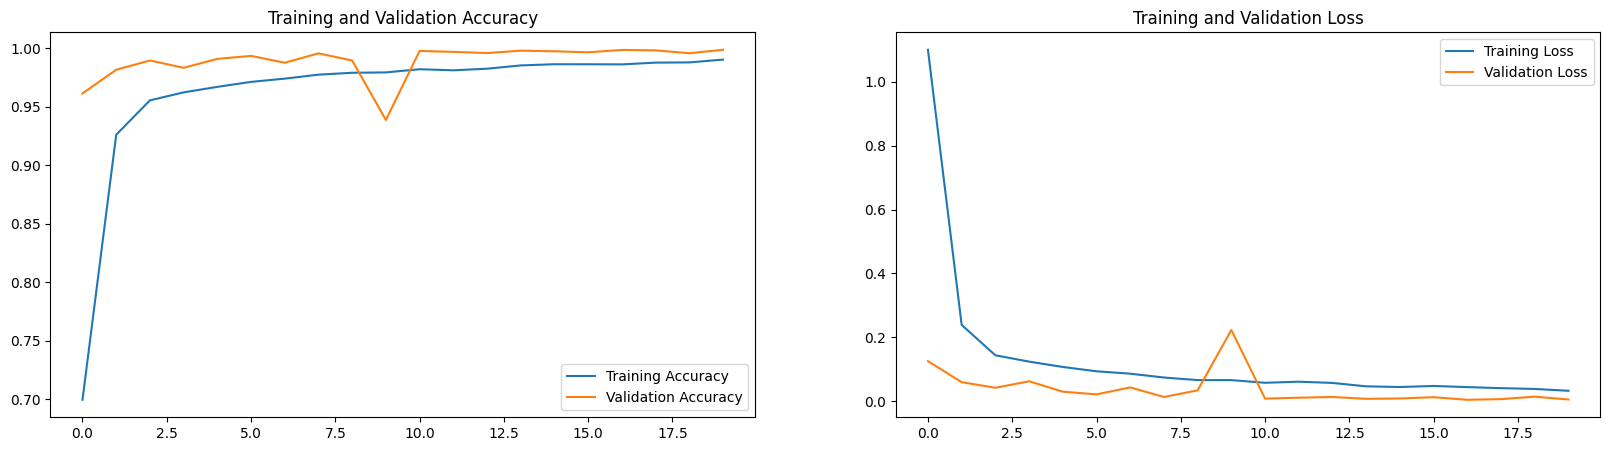

In [13]:
# Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **IV. Testing and performance evaluation**

In [14]:
# Predictions on the test set
def make_test_set_manual():
  # reading the CSV file
  test_csv = pd.read_csv('/content/GTSRB_dataset/Test.csv')
  test_img_paths = test_csv["Path"].values
  test_labels = test_csv["ClassId"].values
  int_test_labels = [int(label) for label in test_labels]
  test_ds = []

  for img in test_img_paths:
    image = tf.keras.utils.load_img(DATASET_PATH + '/' + img, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = tf.keras.utils.img_to_array(image)
    test_ds.append(np.array(img_array))

  X_test = np.array(test_ds)

  return X_test, test_labels, test_img_paths


def manual_test(x,y,batch_size):
  pred_set = model.predict(X_test,batch_size=TEST_BATCH_SIZE)
  prediction_set = []
  corr = 0
  for iter in range(pred_set.shape[0]):
    scores = tf.nn.softmax(pred_set[iter])
    prediction = int(train_ds.class_names[np.argmax(scores)])
    prediction_set.append(prediction)
  for idx, pred in enumerate(prediction_set):
    if pred == test_labels[idx]:
      corr += 1
  accuracy = corr/test_labels.shape[0]

  return accuracy, prediction_set

X_test, test_labels, test_img_paths = make_test_set_manual()
accuracy, prediction_set = manual_test(x=X_test,y=test_labels, batch_size=TEST_BATCH_SIZE)
print("\nAccuracy: {:.5f}% on test images." .format(accuracy*100))

395/395 [==============================] - 1s 2ms/step

Accuracy: 97.45843% on test images.


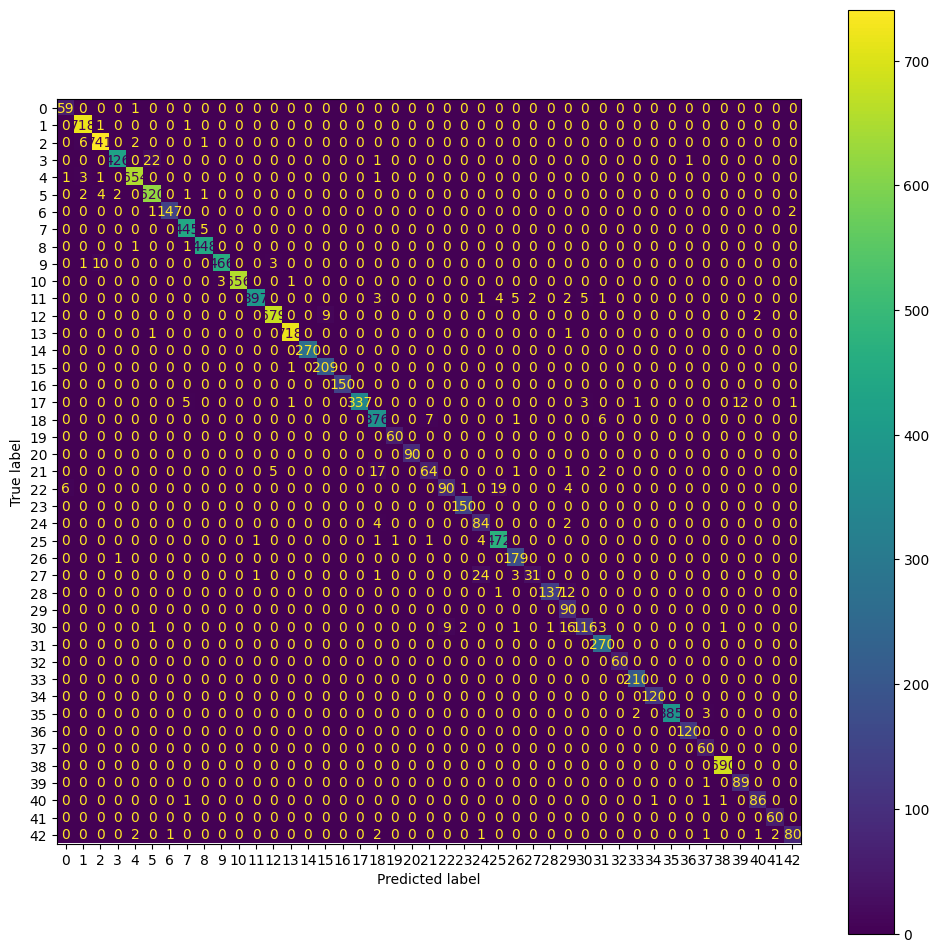

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_labels, prediction_set)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
fig = disp.figure_
fig.set_figwidth(12)
fig.set_figheight(12)
plt.show()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, prediction_set))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94        60
           1       0.98      1.00      0.99       720
           2       0.98      0.99      0.98       750
           3       0.99      0.95      0.97       450
           4       0.99      0.99      0.99       660
           5       0.96      0.98      0.97       630
           6       0.99      0.98      0.99       150
           7       0.98      0.99      0.98       450
           8       0.98      1.00      0.99       450
           9       0.99      0.97      0.98       480
          10       1.00      0.99      1.00       660
          11       0.99      0.95      0.97       420
          12       0.99      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       1.00      1.00      1.00       150
          17       1.00    

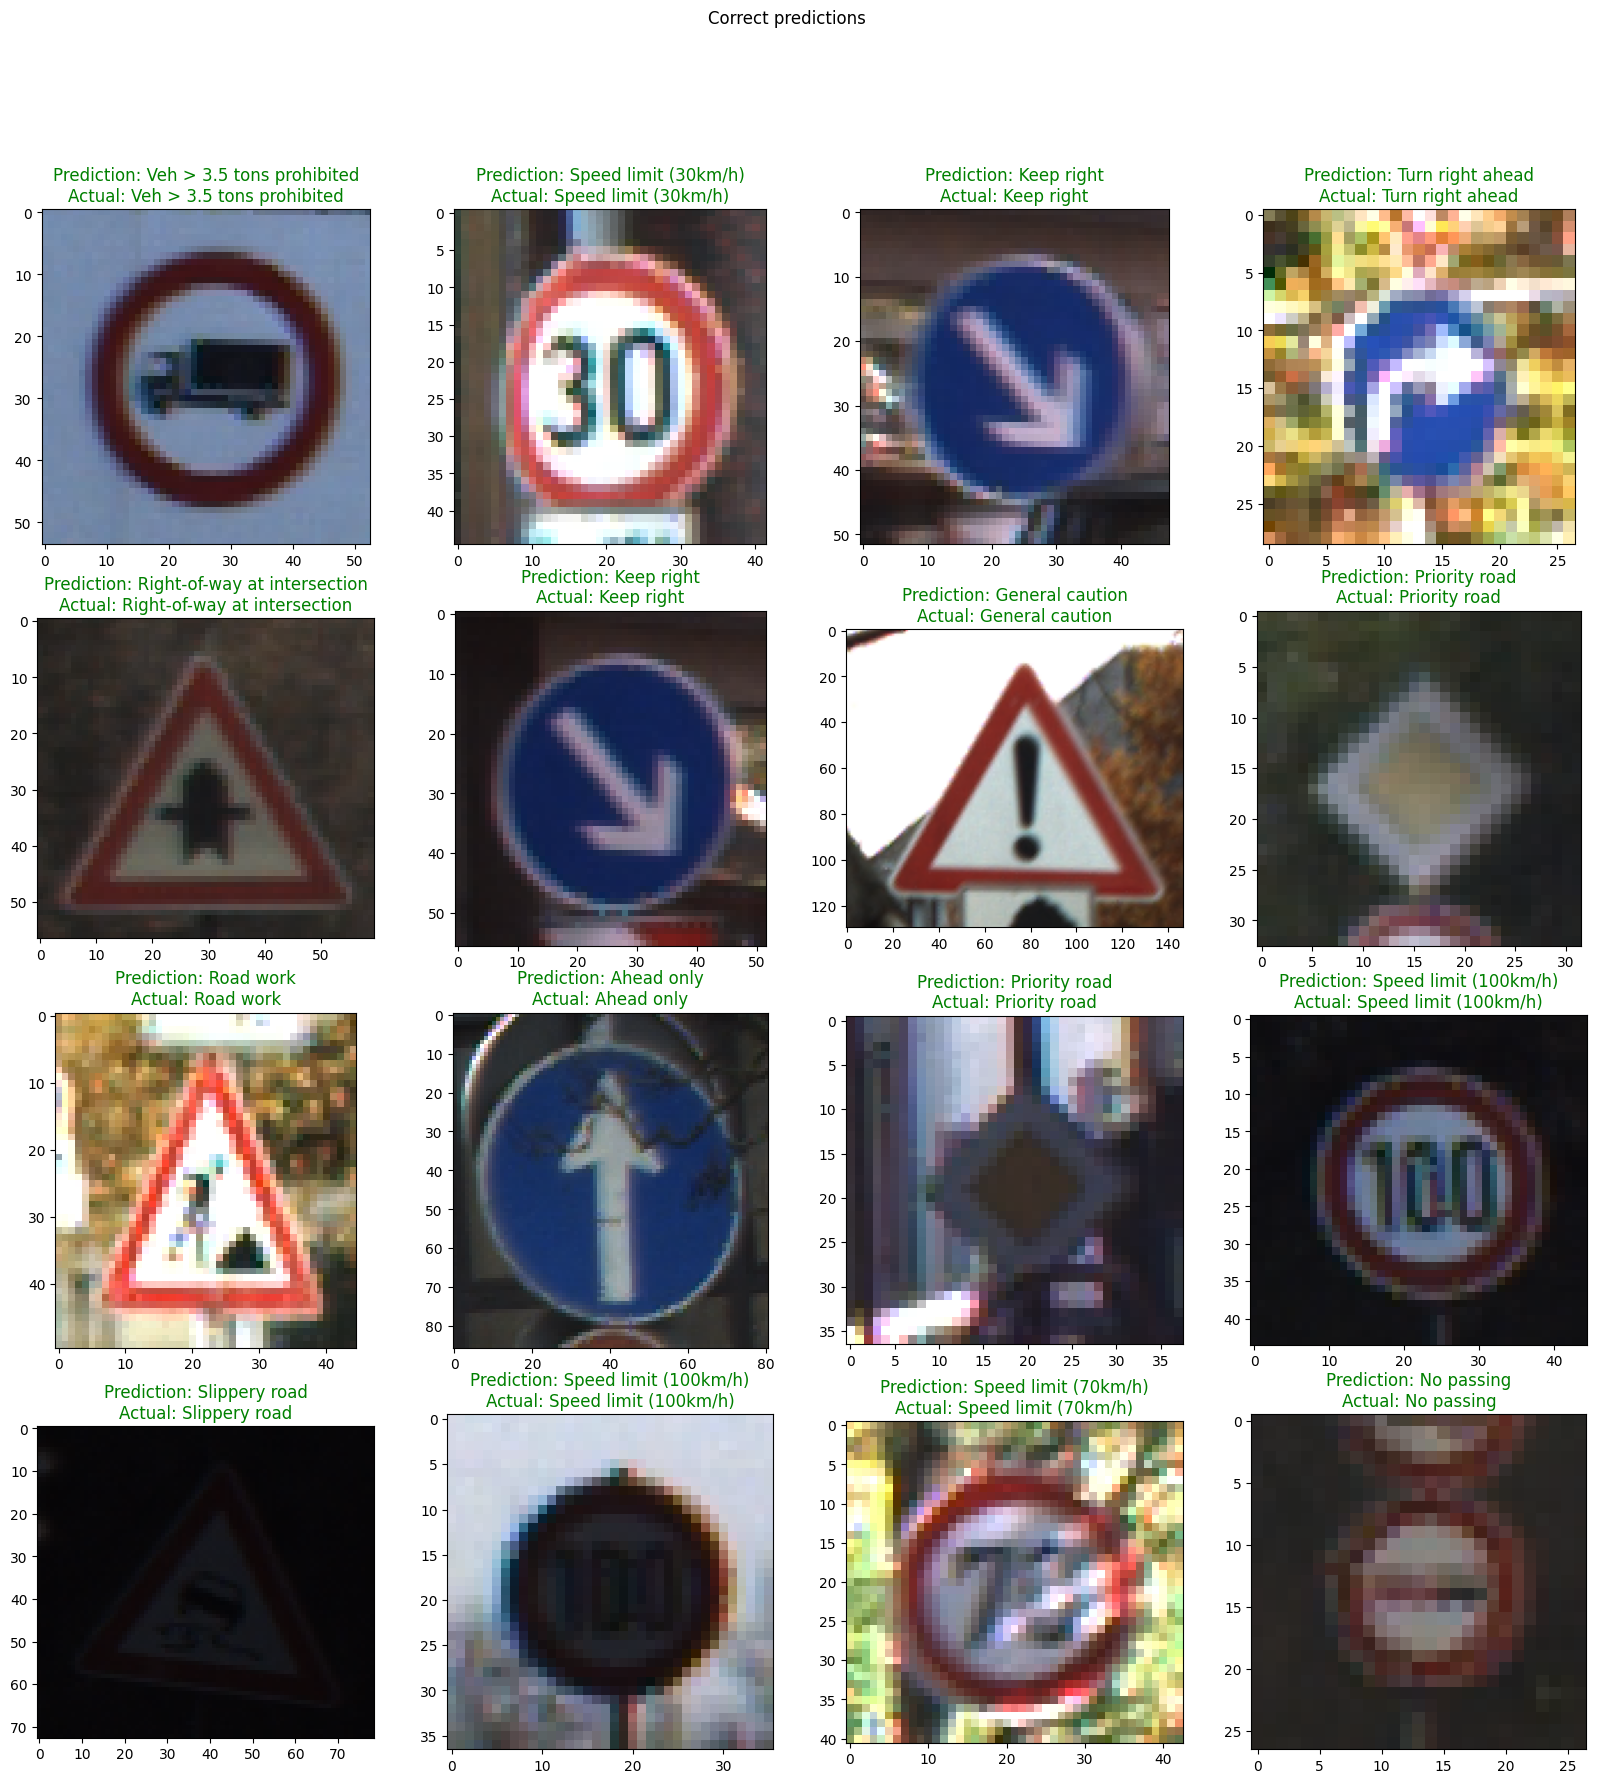

In [17]:
# Showing correct prediction examples
fig_correct = plt.figure(figsize=(20, 20))
fig_correct.suptitle("Correct predictions")
plt_cnt = 1
label_cnt = 0

for prediction in prediction_set:
  if prediction == test_labels[label_cnt]:
    test_img_path = test_img_paths[label_cnt]
    test_img = tf.keras.utils.load_img(DATASET_PATH + '/' + test_img_path)
    img_array = tf.keras.utils.img_to_array(test_img)
    img_array = tf.expand_dims(img_array, 0)
    ax = fig_correct.add_subplot(4, 4, plt_cnt)
    ax.set_title(str("Prediction: {}\nActual: {}".format(classes[prediction],classes[test_labels[label_cnt]])), color = 'g')
    plt.imshow(test_img)
    plt_cnt += 1
  label_cnt +=1
  if plt_cnt == 17:
    break
plt.show()

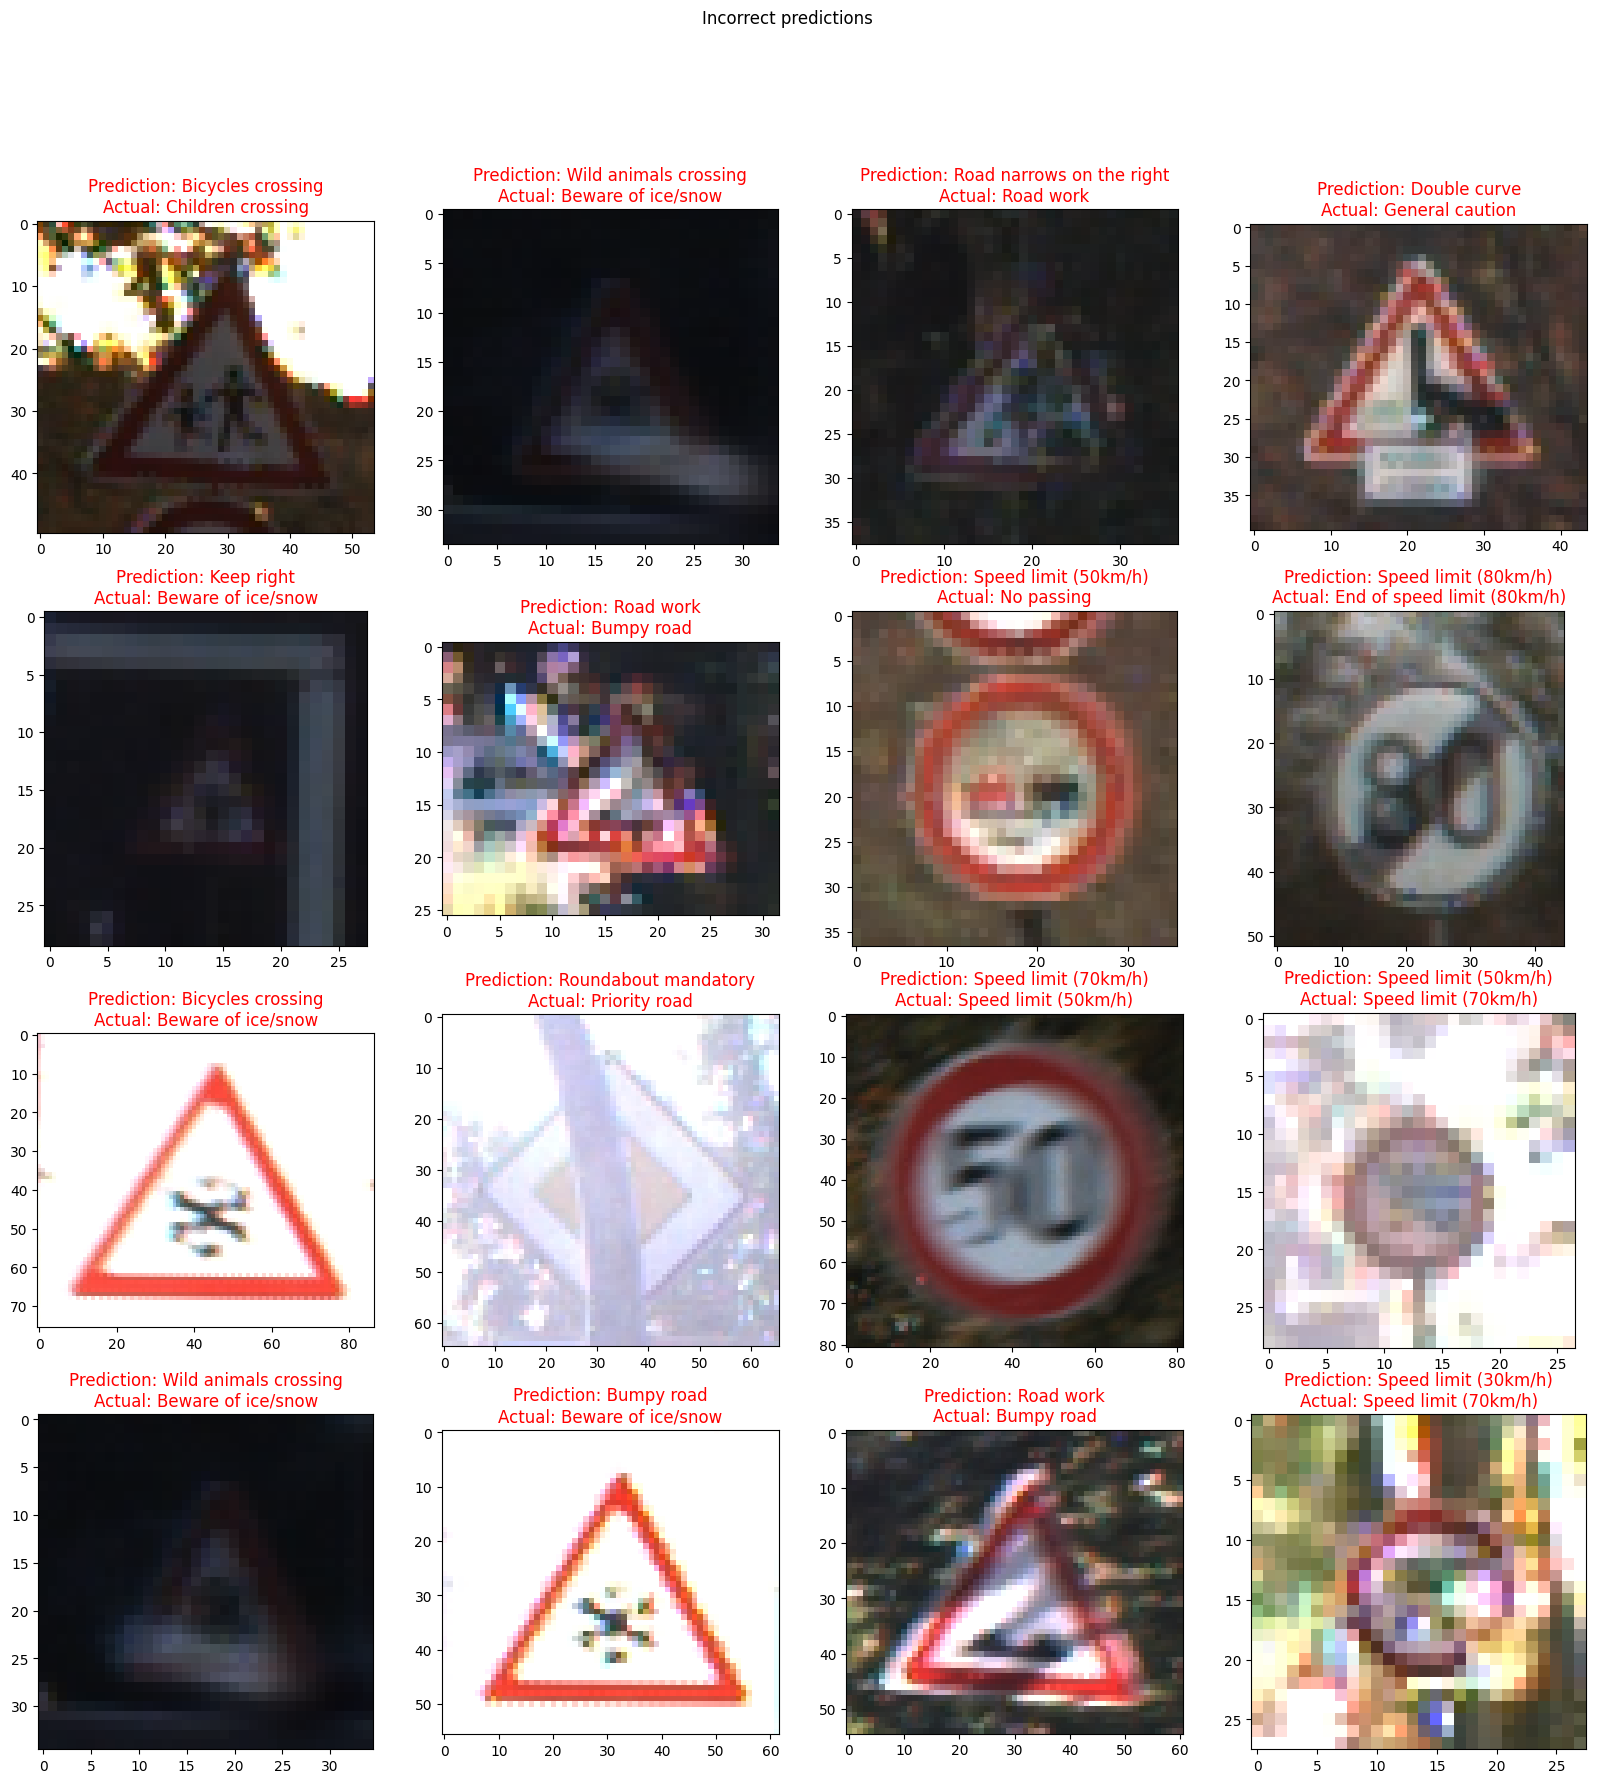

In [18]:
# Showing incorrect prediction examples
fig_correct = plt.figure(figsize=(20, 20))
fig_correct.suptitle("Incorrect predictions")
plt_cnt = 1
label_cnt = 0

for prediction in prediction_set:
  if prediction != test_labels[label_cnt]:
    test_img_path = test_img_paths[label_cnt]
    test_img = tf.keras.utils.load_img(DATASET_PATH + '/' + test_img_path)
    img_array = tf.keras.utils.img_to_array(test_img)
    img_array = tf.expand_dims(img_array, 0)
    ax = fig_correct.add_subplot(4, 4, plt_cnt)
    ax.set_title(str("Prediction: {}\nActual: {}".format(classes[prediction],classes[test_labels[label_cnt]])), color = 'r')
    plt.imshow(test_img)
    plt_cnt += 1
  label_cnt +=1
  if plt_cnt == 17:
    break
plt.show()

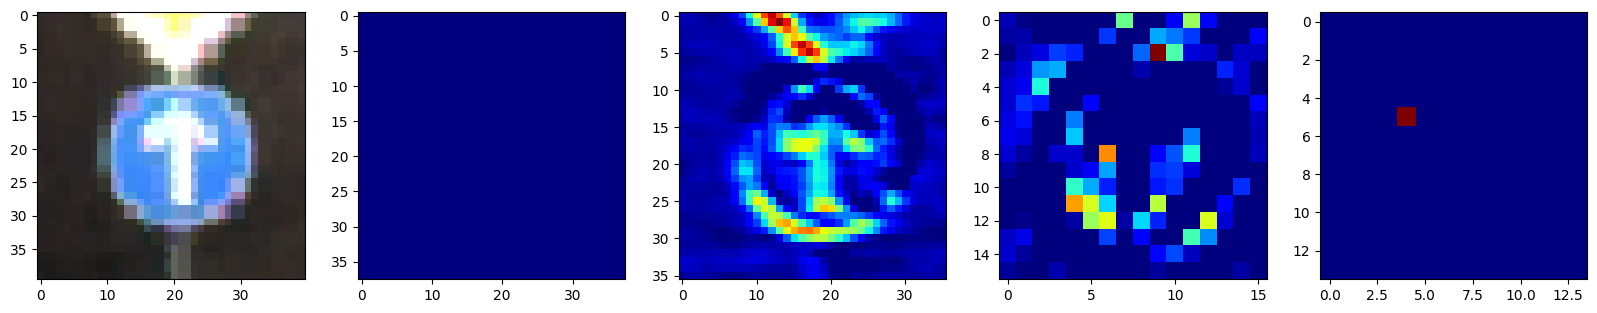

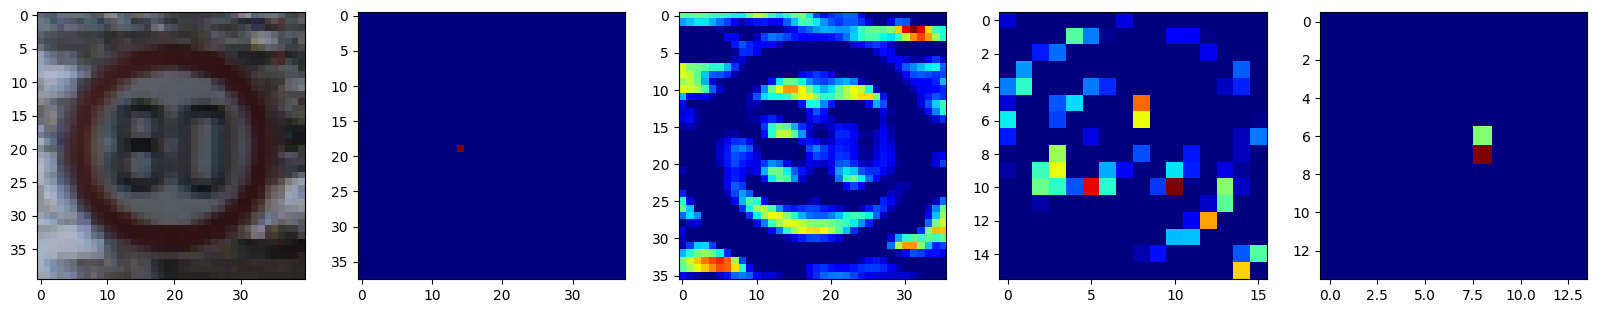

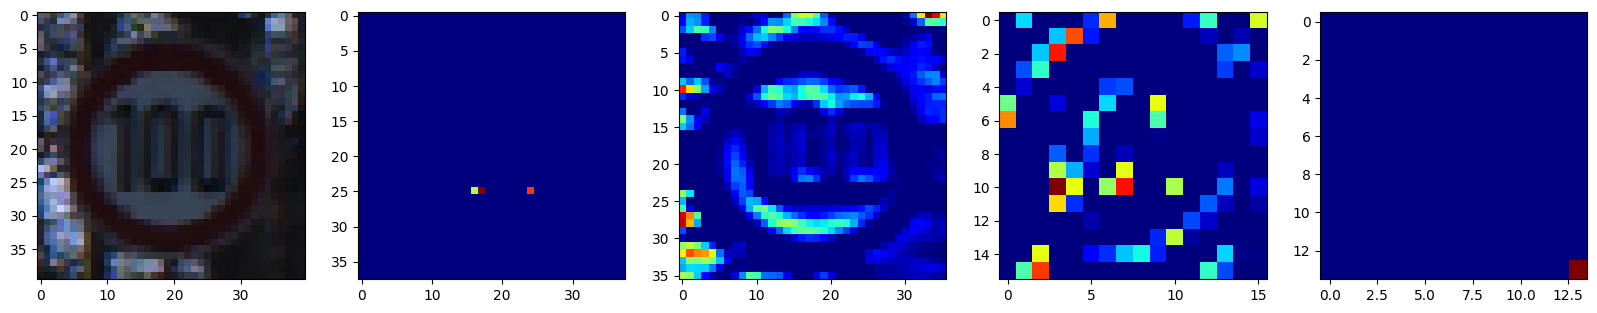

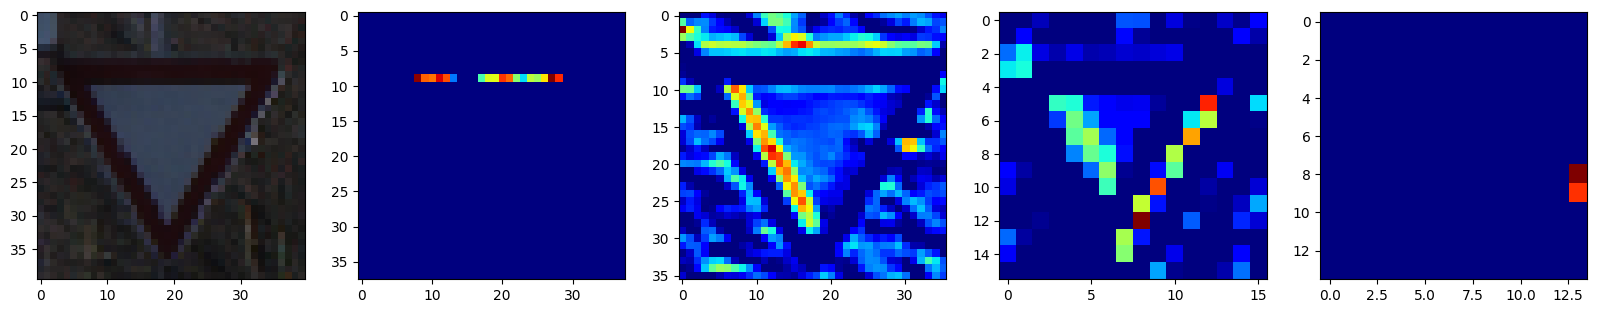

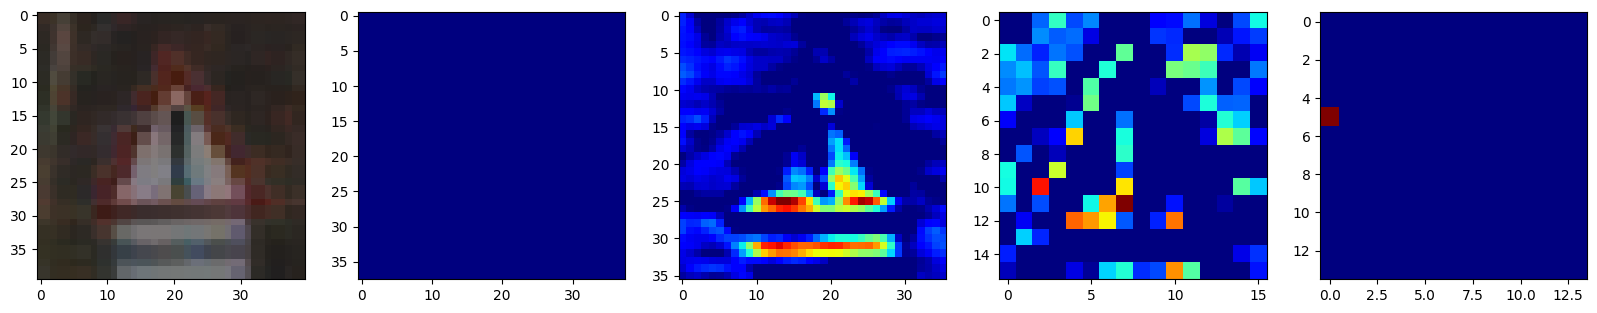

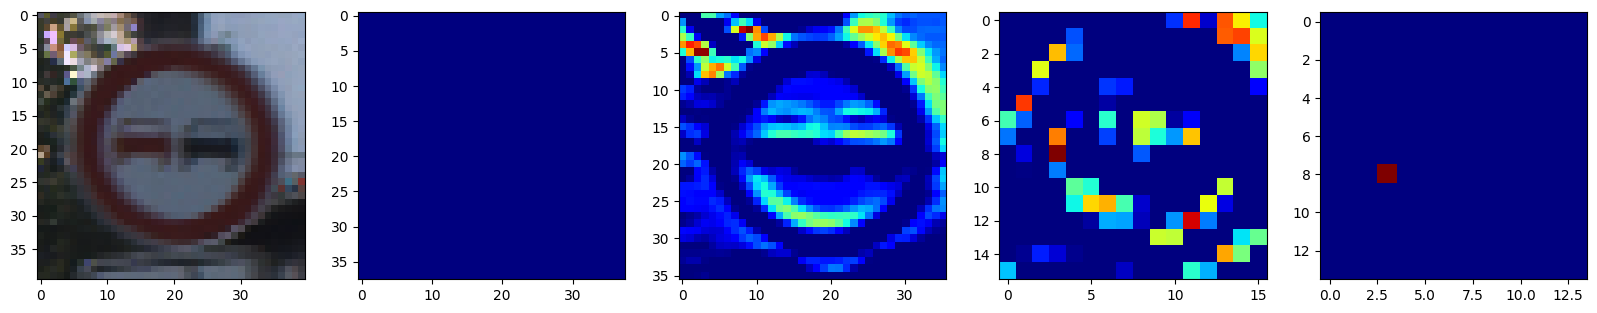

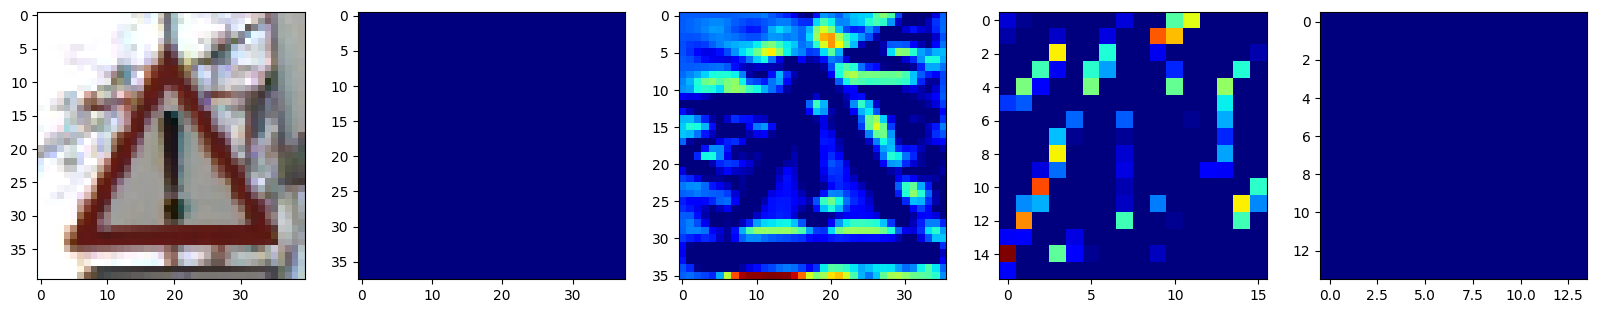

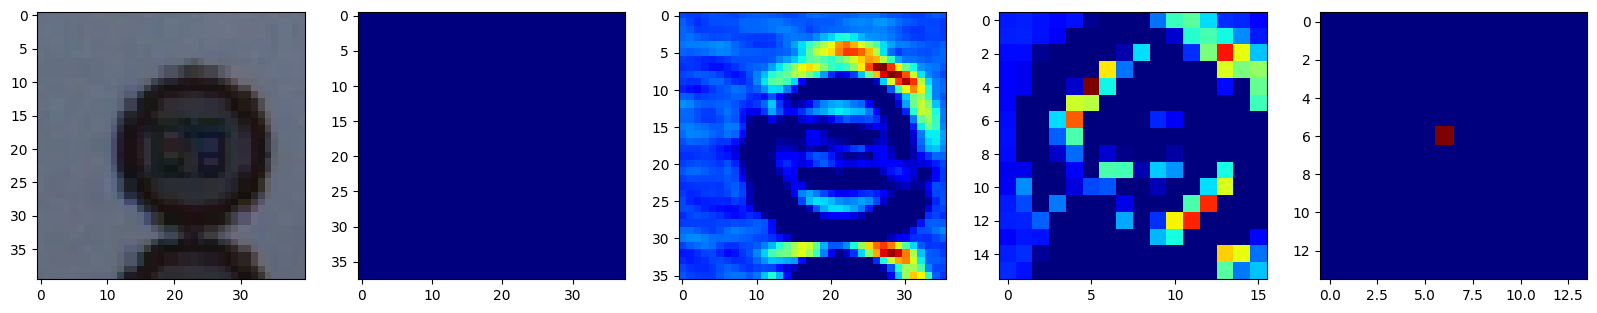

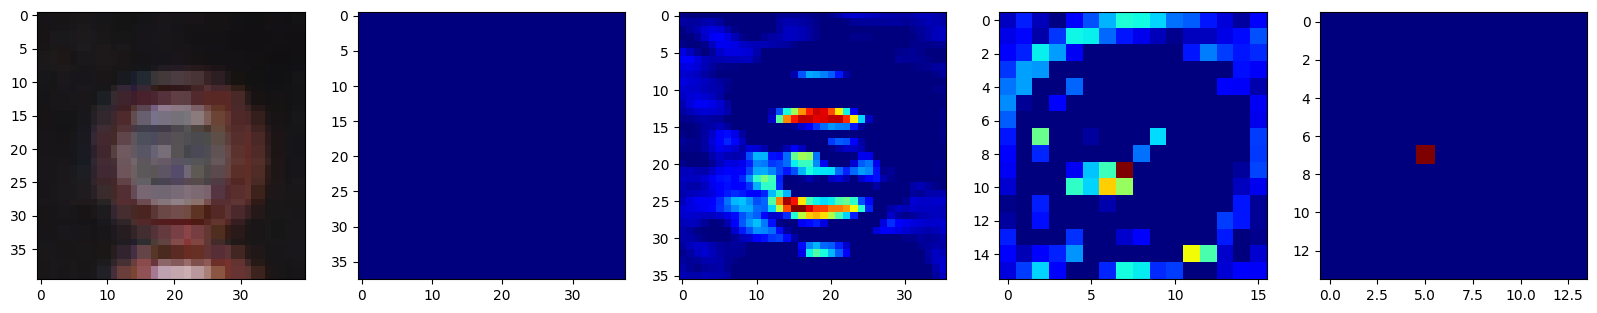

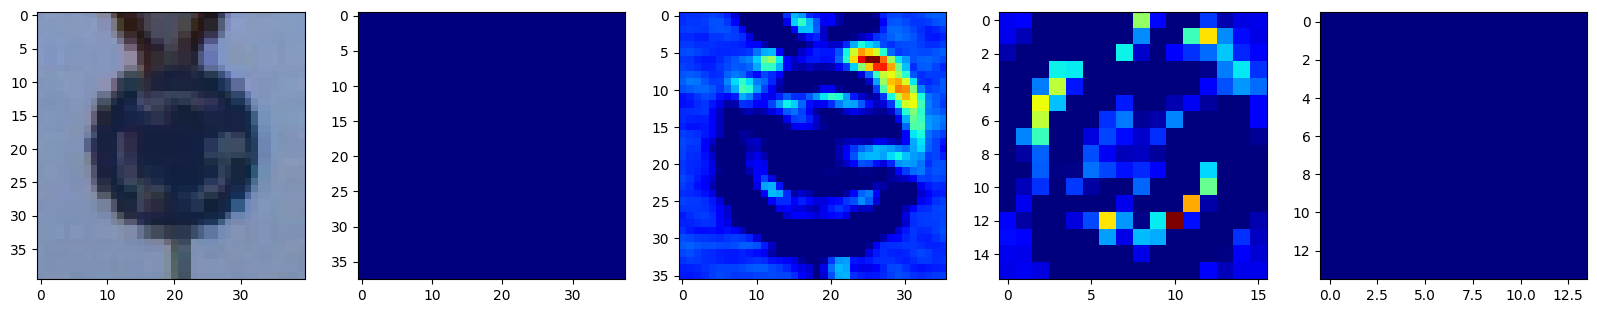

In [19]:
# Visualizing heatmaps of convolutional layers
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
num_of_vis_images = 10

for i in range(num_of_vis_images):
  img = tf.keras.preprocessing.image.load_img('/content/GTSRB_dataset/Test/'+ np.random.choice(os.listdir('/content/GTSRB_dataset/Test/')), target_size=(IMG_HEIGHT, IMG_WIDTH))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  activations = activation_model.predict(img_array, verbose= 0)

  fig_conv = plt.figure(figsize=(20, 20))
  fig_conv.add_subplot(1,5,1)
  plt.imshow(img)
  for act in range(len(activations)):
    fig_conv.add_subplot(1, 5, act+2)
    plt.imshow(activations[act][0, :, :, 0], cmap='jet')
  plt.show()
